# Sampling methods

## Preliminaries

### Expectation

먼저 기댓값의 정의는 다음과 같다.

(X가 discrete random variable이면)
$$E[X] = \sum_{x} x \cdot p_X(x) \tag{1}$$  

(X가 continuous random variable이면)
$$E[X] = \int_{-\infty}^{\infty} x \cdot f_X(x) \space dx \tag{2}$$


여기서 의미를 들여다보면 Random variable $X$에서 X의 모든 범위 내의 각 실수 $x$에 대해 해당 실수 $x$가 나올 확률($p_X(x)$)을 모두 곱해줘서 더하는 식으로 X에 대한 평균을 찾는 것이다(개념적으로 가중 평균이라 생각하면 된다). 다만 $X$가 discrete random variable이면 정확한 확률 개념 $p_X(x)$ (Probability Mass Function)을 곱해주고, continuous random variable이면 적분 연산 내에서 확률 밀도 $f_X(x)$ (Probability Density Function)를 곱해준다.

### Monte-Carlo Method

우리가 다루는 실제 세상의 문제에서는 체계적인 움직임과 더불어 우연성을 갖는 확률적 움직임(Stochastic dynamics)을 동반하는 것이 보통인데, 이런 확률적 현상을 시뮬레이션하기 위해선 sample이 필요하다. 이 sample을 이용한 시뮬레이션을 Monte-Carlo Method라 부른다.  

어떤 수리적 문제에서 닫힌해(Closed form solution)을 구할 수 없거나, 닫힌해가 너무 복잡한 경우에 이 Monte-Carlo Method를 주로 이용한다.

방법은 확률변수 $x$의 확률분포 $p_X(x)$로부터 서로 독립인 관찰값들 $x_1, x_2, \cdots, x_n$을 발생시켜 이들의 표본평균을 기대값 $E(X)$의 근사값으로 사용하는 것이다. 표본평균에 대한 식은 다음과 같다. 
$$\bar{x} = \frac{1}{n} \sum_{i=1}^{n}{x(i)} \tag{3}$$
이 식에서 $x(i)$는 확률분포 $p_X(x)$에서 sampling 된 것이기 때문에 sampling을 하는 순간 $x \cdot p_X(x)$가 녹아 있는 것이다. n은 내가 sampling을 하고자 하는 횟수이고, 대수의 법칙에 따라 n이 증가할 수록 표본평균은 모평균에 수렴한다.

Random variable을 좀 일반화시켜서 모든  r.v를 continuous로 표현할 때, 기댓값은 정적분이므로, Monte-Carlo Method는 '정적분의 근사값을 구하는 방법'이라고 할 수 있다.

### Importance sampling

(2)를 좀더 일반화 시켜서 Random variable $x$를 받는 함수 $g(x)$의 기댓값을 구하고자 한다면 다음과 같다. 이후 (1), (2)의 확률분포 $p_X(x), f_X(x)$를 $p(x)$로 통일시켜 표기하자.
$$\theta = E_p\left(g(x)\right) = \int_{-\infty}^{\infty}g(x)\space p(x)dx \tag{4}$$

그리고 실제적으로 Monte-Carlo Method로 위 기댓값을 구한다면 다음과 같을 것이다.
$$E_p(g(x)) = \frac{1}{n} \sum_{i=1}^{n} g(x) \space p(x) \tag{5}$$

여기서 기댓값 연산자 $E_f$는 확률밀도함수 $f(x)$에 대한 기대값을 의미한다. 그러나 위 방식으로 기댓값을 구하기 위해선 분포 $f(x)$로부터 sampling을 할 수 있어야 한다. 또한 x의 차원이 클 시에 합산항의 숫자가 기하급수적으로 늘어나는 문제도 있다.  
무엇보다도 식 (5)의 $f(x)$는 모든 x범위의 분포를 사용하여 sampling을 하겠다는 의미이다. 그러나  우리가 관심을 가지는 확률분포들은 종종 x 공간 상의 상대적으로 작은 구역에 대부분의 질량을 갖고 있기 때문에 고차원 문제에 대해 이러한 sampling을 한다는 것은 매우 비효율적이다. 대신 $f(x)$가 큰 구역(예. 최빈값)이나 $g(x) \space p(x)$가 큰 구역(예. 낮은 p(x)라도 상대적으로 높은 g(x)값)에서 sampling을 할 수 있다면 이상적일 것이다.  

Importance sampling은 쉽게 sampling을 시행할 수 있는 제안분포(Proposal distribution) $q(x)$를 사용하는 것에 기반을 두고 있다.
함수 $g(x)$와 정의역이 동일한 어떤 확률밀도함수 $q(x)$에 대해서 다음 식들이 성립한다.  

$$\theta = \int_{-\infty}^{\infty}\frac{g(x) \space p(x)}{q(x)} q(x) dx = E_q\left( \frac{g(x) \space p(x)}{q(x)}\right) \tag{6}$$

만약 함수 $\frac{g(x)p(x)}{q(x)}$가 상수에 가깝도록 확률밀도함수 $q(x)$를 선택할 수 있고, 또한 확률밀도함수 $q(x)$를 따르는 sample들의 생성이 쉽다면, 다음 식을 이용해서 정적분 $\theta$를 추정할 수 있다.  

$$\hat{\theta} = \frac{1}{n} \sum_{i=1}^{n}\frac{g(x(i)) \space p(x(i))}{q(x(i))} \tag{7}$$

여기서 $x_1, x_2, \cdots, x_n$은 확률밀도함수 $q(x)$에서 생성된 샘플들이다. 이렇게 함으로써 $q$에서 sampling을 하여 $\frac{g \space p}{q}$의 평균을 구하면 된다. 

(7)식에서 $\frac{p(x(i))}{q(x(i))}$값을 '중요도 가중치(Importance weight)'라 한다. 이것은 잘못된 분포 $q(x)$에서 sampling을 함으로써 발생한 편향을 수정하는 역할을 한다. 

종종 분포 $p(x)$는 정규화 상수를 제외한 부분까지만 계산이 가능하다. 즉 $p(x) = \frac{\tilde p(x)}{Z_f}$에 대해 $\tilde p(x)$는 쉽게 계산 가능하지만, $Z_p$는 알려져 있지 않을 수 있다는 말이다. 마찬가지도 $q(x)$도 같은 성질을 가지므로 $q(x) = \frac{\tilde q(x)}{Z_q}$를 이용할 수 있다. 이 경우 다음의 식을 얻게 된다.

\begin{align}
E[g(x)] & = \int {g(x)p(x)dx} \\
& = \frac{Z_q}{Z_p} \int{g(x) \frac{\tilde p(x)}{\tilde q(z)}q(x) dx} \\
& \simeq \frac{Z_q}{Z_p} \frac{1}{n} \sum_{i=1}^{n} \tilde r_i \space g(x(i)) \tag{8}
\end{align} 

여기서 $\tilde r_i = \frac{\tilde p(x(i))}{\tilde q(x(i))}$이다. 같은 sample 집합을 이용해서 비율 $\frac{Z_p}{Z_q}$를 계산할 수 있다.

\begin{align}
\frac{Z_q}{Z_p} & = \frac{1}{Z_q} \int{\tilde p(x) dx} = \int{\frac{\tilde p(x(i))}{\tilde q(x(i))}q(x)dx} \\
& \simeq \frac{1}{n} \sum_{i=1}^{n} \tilde r_i \tag{9}
\end{align}

따라서 다음과 같다.  
$$E[g(x)] \simeq \sum_{i=1}^{n} w_i g(x(i)) \tag{10}$$

여기서 $w_i$는,
$$w_i = \frac{\tilde r_i}{\sum_m \tilde r_m} = \frac{\frac{\tilde p(x(i)}{q(x(i))}}{\sum_m \frac{\tilde p(x(m))}{q(x(m))}}$$

Importance sampling의 성공여부는 제안분포 $q(x)$가 원 분포 $p(x)$에 얼마나 잘 맞느냐에 달려있다. 만약 $p(x)$가 변동이 심하며, 질량의 대부분이 x공간상의 작은 지역에 모여 있다면 중요도 가중치 {$r_i$}들 중 소수의 가중치가 큰 값을 가지고 나머지 가중치들은 상대적으로 중요하지 않은 취급을 받는다. 그 결과 sample의 수는 추출된 sample의 수 n보다 훨씬 작다. $g(x) \space p(x)$가 큰 구간에서 sample이 전혀 추출되지 않는다면 문제는 더 심각해진다. 이 경우에는 실제로는 기댓값에 대한 추정이 매우 틀렸음에도 불구하고 $r_i$와 $r_i \space g(x(i))$에 대해 드러나는 분산의 값이 작을 수 있다. 즉, Importance sampling은 임의적으로 오류가 있는 결과를 내놓으며, 이에 대해 검사가 필요하다는 표시조차 보이지 않을 수 있는 단점을 가졌다. 

또한 이로부터 분포 $q(x)$에 대한 한 가지 필요 조건을 확인할 수 있다. $p(x)$가 중요할 수도 있는 구간에서는 $q(x)$가 작으면 안 된다는 것이다.

### KL Divergence

KL Divergence의 정의는 분포와 분포 사이의 거리 개념으로 쓰이는 metric이다(distance metric 요건을 완전히 충족시키지 못하므로 완전한 거리는 아님). 수식은 다음과 같다.

\begin{align}
D_{KL}\left[p(X) \space||\space q(X)\right] &= \sum_{x \in X} p(x) \space \log{\left( \frac{p(x)}{q(x)}\right)} \tag{11}\\
&= \sum_{x \in X}  - p(x) \space \log q(x) + p(x) \space \log p(x) \tag{12}\\
\end{align}

여기서  
$ - p(x) \space \log q(x)$는 $Cross \space Entropy$  
$ - p(x) \space \log p(x)$는 $Entropy$를 뜻하므로,  

Cross Entropy에서 Entropy를 뺀 형식이라 할 수 있다. Cross Entropy는 항상 Entropy보다 약간 더 큰 값을 가지므로 위와 같은 꼴의 forward KL Divergence는 항상 0보다 큰 값을 갖는다. 

KL Divergence를 이용한 학습은 forward와 backward 모두 $q$가 $p$를 잘 묘사하는 게 목적이지만, p의 '어떤 점'을 묘사할 것인가에 따라 선택이 나뉜다. 둘 중 어떤 metric이 우리 모델과 적합하느냐는 (11)식의 수식에 따라 다음과 같은 기준으로 나뉜다.  

"$p(x)$가 0에 가까운 지점에서의 p, q차이는 관심 없고 $p(x)$가 중요한 곳(높은 값)에서의 차이를 최소한으로 줄이겠다"

                                                         vs.  

"$q(x)$가 0에 가까운 지점에서의 p, q차이는 관심 없고 $q(x)$가 중요한 곳(높은 값)에서의 차이를 최소한으로 줄이겠다"


forward KL divergence는 전자가 목적일 때 선택하여, 아래 그림과 같이 주로 $p(x)$가 중요할 수 있는 부분들을 한 군데도 놓치고 싶지 않을 때 사용한다. 주로 가능성을 모두 포괄하는 중간값(기댓값)을 도출해내는 'Regression 문제'에 적합하다. (무슨 모델에 주로 쓰이는지 설명 추가)

![forward_kl_good](./forward_kl_good.png "forward good")

반면 backward KL divergence는 후자가 목적일 때 선택하여, 아래와 그림과 같이 $p(x)$가 중요할 수 있는 부분 중 한 군데라도 $q(x)$가 잘 묘사하고 싶을 때 사용한다. 이때는 q(x)가 p(x)의 중요한 특정 부분에 대해서 잘 묘사하는 게 목적이기 때문에, Classification 문제에 적합하다. Variational Inference에서 쓰인다.
(reverse KL는 p를 묘사하기 위해 q를 쓸 때의 정보의 손실을 측정한다. 우리는 $\phi$에 관하여 이 양을 최소화하기를 원한다.)

![forward_kl_bad](./forward_kl_bad.png "backward good")

정리하면 Using this loss encourages the approximate proposal distribution to be broader than the true posterior (mass covering), whereas variational inference typically learns a narrower approximation (mode seeking)

물론 위의 그림들을 보고 $q(x)$도 $p(x)$처럼 쌍봉의 분포를 가져서 기댓값의 weight를 잘 갖게 하면 되지 않느냐,라 생각할 수 있지만, 이 같은 차선의 선택 우선순위는 실제 문제에서 모집단 $p(x)$는 알려져 있지 않은 상태에서, $q(x)$를 정규분포로 설정하고 fitting을 하는 일반적인 상황에서의 우선순위이다.

## Inference compilation

Inference compilation(a.k.a Compiled Sequential Importance Sampling)은 Importance Sampling에서의 제안분포를 학습하여 추론의 계산 비용을 줄이는 기법이다. Inference compilation에서 이 제안분포는 신경망으로 parametrized된다.

제안분포(Proposal distribution)는 다음과 같이 (11)의 forward KL divergence $KL(p(z|x) \space ||\space q_{\phi,x}(z))$를 최소화하여 학습한다.  
($\space q_{\phi,x}(z)$부분 표기 수정 필)

Importance Sampling의 경우 $q$를 $p$보다 fat-tail로 설정하는 게 바람직하다. (왜 그런지는 [https://stats.stackexchange.com/questions](https://stats.stackexchange.com/questions/76798/in-importance-sampling-why-should-the-importance-density-have-heavier-tails "why IS need to set fat tail"))

따라서 Inference Compilation loss가 Importance sampling에서 제안분포를 편집하는 게 더 적합하다.

Inference Compilation의 또 다른 이점은 많은 유형의 Variational Inference과는 달리 모델이 미분가능할 것을 요구하지 않는다는 것이다. 이를 통해 임의의 복잡한 프로그램에 대한 추론(예: Captcha renderer [1])에 사용할 수 있다.

이 예제는 Inference Compilation이 알려진 Analytic solution으로 단순한 문제에 대한 추론을 가속화하기 위해 사용되는 것을 보여준다.

### Codes example

In [1]:
import torch
import torch.nn as nn
import torch.functional as F

import pyro
import pyro.distributions as dist
import pyro.infer
import pyro.optim

import os

n_steps = 2000

추론 편성은 관찰된 값에 대한 추론을 수행하는 법을 배우므로 observation의 값이 무엇인지에 대해서는 중요하지 않다.(?) 여기서 0을 사용한다.

In [2]:
def model(prior_mean, observations={"x1": 0, "x2": 0}):
    x = pyro.sample("z", dist.Normal(prior_mean, torch.tensor(5**0.5)))
    y1 = pyro.sample("x1", dist.Normal(x, torch.tensor(2**0.5)), obs=observations["x1"])
    y2 = pyro.sample("x2", dist.Normal(x, torch.tensor(2**0.5)), obs=observations["x2"])
    return x

Guide는 제안 분포를 만들기 위해 관찰된 값을 사용하도록 학습(편집)된다. [1] 논문에서는 어떤 모델에 대해서도 신경망 구조가 자동으로 생성된다. 그러나 Pyro에서 구현하려면 task-specific guide를 지정해야 한다. 모든 Pyro Guide 기능과 마찬가지로, 이것은 Model과 동일한 call signiture을 가져야 한다. 또한 Model과 동일한 unobserved sample statement로 마주쳐야 한다. Guide가 좋은 제안 분포를 만들도록 훈련되게, sample statements의 분포는 observation의 값에 의존해야 한다. 이 예에서는, latent variable에 대한 제안분포에 관측치를 매핑하기 위해 feed-forward Neural Network을 사용한다.

*pyro.module*은  guide의 parameter들이 학습되는 동안 optimizer에 의해 발견될 수 있도록 guide function이 실행될 때 call되어야 한다.

In [3]:
class Guide(nn.Module):
    def __init__(self):
        super(Guide, self).__init__()
        self.neural_net = nn.Sequential(
            nn.Linear(2, 10),
            nn.ReLU(),
            nn.Linear(10, 20),
            nn.ReLU(),
            nn.Linear(20, 10),
            nn.ReLU(),
            nn.Linear(10, 5),
            nn.ReLU(),
            nn.Linear(5, 2))

    def forward(self, prior_mean, observations={"x1": 0, "x2": 0}):
        pyro.module("guide", self)
        x1 = observations["x1"]
        x2 = observations["x2"]
        v = torch.cat((x1.view(1, 1), x2.view(1, 1)), 1)
        v = self.neural_net(v)
        mean = v[0, 0]
        std = v[0, 1].exp()
        pyro.sample("z", dist.Normal(mean, std))

guide = Guide()

이제 Inference Compilation의 instance를 만들어 보자.
그 객체는 Model, Guide, Guide 학습을 위한 PyTorch Optimizer, 그리고 추론을 수행할 때 그릴 Importance-weighted samples 수로 초기화된다. 이 Guide는 Model/Guide 인자의 특정 값(prior_mean)에 대해 최적화되며, 학습 및 추론 전반에 걸쳐 여기에 설정된 값을 사용한다.

In [4]:
optimizer = pyro.optim.Adam({'lr': 1e-3})
csis = pyro.infer.CSIS(model, guide, optimizer, num_inference_samples=50)
prior_mean = torch.tensor(1.)

이제 이 Model에 대한 inference를 수행하기 위해 instance를 '편집'(학습)해보자. csis.step에 주어진 인자는 loss을 평가하기 위해 실행될 때 Model과 Guide에 전달된다.

In [5]:
for step in range(n_steps):
    csis.step(prior_mean)

이제 Importance Sampling을 통해 Inference를 수행해보자.
편집(학습)된 Guide $q_{\phi^*}(z)$는 이제 모든 $x1,\space x2$에 대해 posterior $p(z|x_1,x_2)$에 가깝게 근사하는 z에 대한 분포를 제안할 수 있어야 한다. 학습된 parameter로 posterior를 만들 때, 새로운 observation과 동일한 prior_mean을 다시 입력한다.

In [6]:
posterior = csis.run(prior_mean,
                     observations={"x1": torch.tensor(8.),
                                   "x2": torch.tensor(9.)})
marginal = pyro.infer.EmpiricalMarginal(posterior, "z")

이제 결과를 plot하고 Importance Sampling과 비교해보자.
observation으로 $x_1=8$과 $x_2=9$를 관찰했다. Inference는 각각 Inference Compilation(CSIS), Importance Sampling을 사용하여 50개씩 sampling했다.

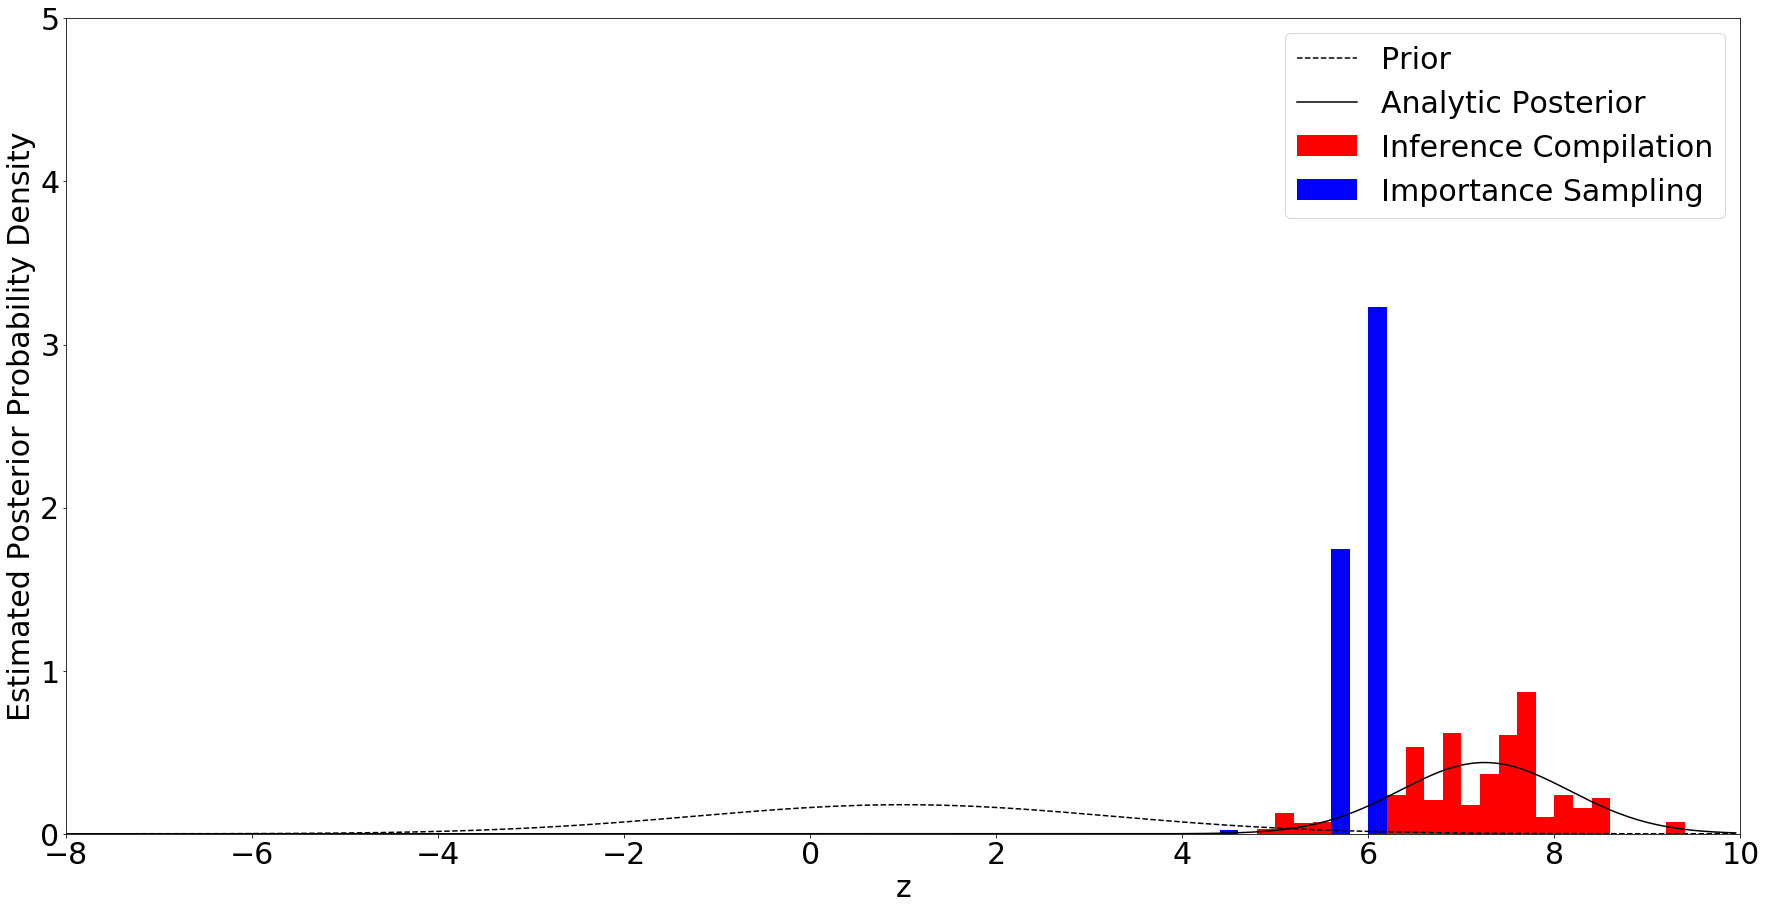

In [11]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Draw samples from empirical marginal for plotting
csis_samples = [marginal().detach() for _ in range(1000)]

# Calculate empirical marginal with importance sampling
is_posterior = pyro.infer.Importance(model, num_samples=50).run(prior_mean,
                                                                observations={"x1": torch.tensor(8.),
                                                                              "x2": torch.tensor(9.)})
is_marginal = pyro.infer.EmpiricalMarginal(is_posterior, "z")
is_samples = [is_marginal().detach() for _ in range(1000)]

# Calculate true prior and posterior over z
true_posterior_z = np.arange(-10, 10, 0.05)
true_posterior_p = np.array([np.exp(scipy.stats.norm.logpdf(p, loc=7.25, scale=(5/6)**0.5)) for p in true_posterior_z])
prior_z = true_posterior_z
prior_p = np.array([np.exp(scipy.stats.norm.logpdf(z, loc=1, scale=5**0.5)) for z in true_posterior_z])

plt.rcParams['figure.figsize'] = [30, 15]
plt.rcParams.update({'font.size': 30})
fig, ax = plt.subplots()
plt.plot(prior_z, prior_p, 'k--', label='Prior')
plt.plot(true_posterior_z, true_posterior_p, color='k', label='Analytic Posterior')
plt.hist(csis_samples, range=(-10, 10), bins=100, color='r', normed=1, label="Inference Compilation")
plt.hist(is_samples, range=(-10, 10), bins=100, color='b', normed=1, label="Importance Sampling")
plt.xlim(-8, 10)
plt.ylim(0, 5)
plt.xlabel("z")
plt.ylabel("Estimated Posterior Probability Density")
plt.legend()
plt.show()

$x_1=8$과 $x_2=9$를 사용하면 posterior는 prior와는 거리가 멀다. 그래서 매우 작은 유효 sample size가 주어진 상황에서. prior를 Importance Sampling의 Guide로 사용하는 것은 비효율적이다. 반면 Inference Compilation(CSIS)은 적절한 Guide function을 처음 학습함으로써 true posterior에 훨씬 더 가깝게 제안분포를 갖는다. 이를 통해 Inference Compilation은 위의 그래프에 나타난 바와 같이 sample들로 하여금 true posterior에 대해 훨씬 더 잘 커버하고, 위 그림에 나타난 바와 같이 훨씬 효과적인 sample size를 사용하여 true posterior를 묘사할 수 있다.